<a href="https://colab.research.google.com/github/sitinmic/michalsitina/blob/master/michalsitina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
PROJECT_ID = "datathonsitina"


In [2]:
import os
from google.colab import auth

#sets dateset
DATASET_PROJECT_ID = 'amsterdamumcdb-data'
DATASET_ID = 'ams102'
LOCATION = 'eu'

#all libraries check this environment variable, so set it:
os.environ["GOOGLE_CLOUD_PROJECT"] = PROJECT_ID

auth.authenticate_user()
print('Authenticated')

Authenticated


In [5]:
import pandas as pd

config_gbq = {'query': 
          {'defaultDataset': {
              "datasetId": DATASET_ID, 
              "projectId": DATASET_PROJECT_ID
              },
           'Location': LOCATION}
           }

In [ ]:
    '''
    SELECT specialty, COUNT(*) AS number_of_admissions
    FROM admissions
    GROUP BY specialty
    ORDER BY number_of_admissions DESC 
    '''

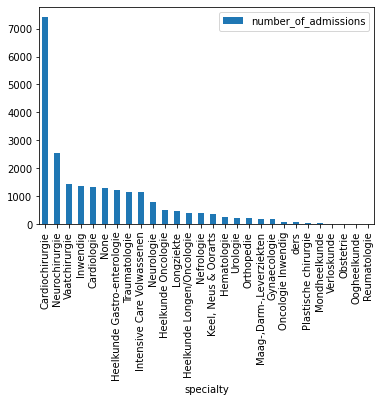

In [6]:
text = "SELECT specialty, COUNT(*) AS number_of_admissions FROM admissions GROUP BY specialty ORDER BY number_of_admissions DESC"

specialties = pd.read_gbq(
      text
    , configuration=config_gbq)
specialties.plot(kind='bar', x='specialty')

In [7]:
#get the amsterdamumcdb package from PiPy repository for use in Colab
!pip install amsterdamumcdb
import amsterdamumcdb as adb

     |████████████████████████████████| 204kB 6.4MB/s 


In [8]:
dictionary = adb.get_dictionary()
dictionary

,itemid,item,item_en,abbreviation,categoryid,category,category_en,ordercategoryid,ordercategory,islabresult,valueid,value,unitid,unit,low_normal_value,high_normal_value,table,count,count_validated
0,7321,Soluvit solution,NaN,SoluvitOpl,276,Additieven,additives,67.0,Injecties Hormonen/Vitaminen/Mineralen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,drugitems,25,NaN
1,12096,ADL Hulp,NaN,Hulp,582,Anamnese-ADL,NaN,NaN,NaN,0.0,1.0,Burenhulp,NaN,NaN,NaN,NaN,listitems,12,12.0
2,12096,ADL Hulp,NaN,Hulp,582,Anamnese-ADL,NaN,NaN,NaN,0.0,2.0,Thuiszorg,NaN,NaN,NaN,NaN,listitems,155,155.0
3,12096,ADL Hulp,NaN,Hulp,582,Anamnese-ADL,NaN,NaN,NaN,0.0,3.0,Kraamhulp,NaN,NaN,NaN,NaN,listitems,1,1.0
4,12099,Allergie 1 Bron,NaN,Bron (1),473,Anamnese-Allergieen&Risicofactoren,NaN,NaN,NaN,0.0,1.0,Anamnestisch,NaN,NaN,NaN,NaN,listitems,1153,1153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9026,8883,Airtrap,NaN,Airtrap,331,ZZ-OUD-Resp-PatientGeg.,NaN,NaN,NaN,0.0,NaN,NaN,6.0,ml,NaN,NaN,numericitems,1508,1476.0
9027,8884,End Tidal CO2 %,end tidal carbon dioxide partial pressure,End Tidal CO2 %,331,ZZ-OUD-Resp-PatientGeg.,NaN,NaN,NaN,0.0,NaN,NaN,0.0,None,NaN,NaN,numericitems,64,58.0
9028,8885,End Tidal CO2 mmHG,end tidal carbon dioxide partial pressure,End Tidal CO2,331,ZZ-OUD-Resp-PatientGeg.,NaN,NaN,NaN,0.0,NaN,NaN,173.0,mmHg,NaN,NaN,numericitems,409,402.0
9029,8886,Beademings Temperatuur,NaN,Beadm. Temp,331,ZZ-OUD-Resp-PatientGeg.,NaN,NaN,NaN,0.0,NaN,NaN,59.0,°C,NaN,NaN,numericitems,67,67.0


In [ ]:
dictionary[dictionary['item'].str.contains('diag', regex=False)]

#dictionary['item'].str.contains('diag')

,itemid,item,item_en,abbreviation,categoryid,category,category_en,ordercategoryid,ordercategory,islabresult,valueid,value,unitid,unit,low_normal_value,high_normal_value,table,count,count_validated
5925,18669,NICE APACHEII diagnosen,NaN,NICE APACHEII diagnosen,709,NICE - Apache,NaN,NaN,NaN,0.0,1.0,Operatief Cardiovasculair - Cardiovasculair,NaN,NaN,NaN,NaN,listitems,4950,4950.0
5926,18669,NICE APACHEII diagnosen,NaN,NICE APACHEII diagnosen,709,NICE - Apache,NaN,NaN,NaN,0.0,2.0,Operatief Cardiovasculair - Cardiovasculair mu...,NaN,NaN,NaN,NaN,listitems,521,521.0
5927,18669,NICE APACHEII diagnosen,NaN,NICE APACHEII diagnosen,709,NICE - Apache,NaN,NaN,NaN,0.0,3.0,Operatief Cardiovasculair - Hartkleppen,NaN,NaN,NaN,NaN,listitems,2218,2218.0
5928,18669,NICE APACHEII diagnosen,NaN,NICE APACHEII diagnosen,709,NICE - Apache,NaN,NaN,NaN,0.0,4.0,Operatief Cardiovasculair - Perifeer vasculair,NaN,NaN,NaN,NaN,listitems,1109,1109.0
5929,18669,NICE APACHEII diagnosen,NaN,NICE APACHEII diagnosen,709,NICE - Apache,NaN,NaN,NaN,0.0,5.0,Operatief Cardiovasculair - Haemorragische shock,NaN,NaN,NaN,NaN,listitems,323,323.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6698,18673,NICE SEC APACHEIV diagnosen,NaN,NICE SEC APACHEIV diagnosen,709,NICE - Apache,NaN,NaN,NaN,0.0,891.0,"Post-operative trauma - Head/face trauma, surg...",NaN,NaN,NaN,NaN,listitems,2,2.0
6699,18673,NICE SEC APACHEIV diagnosen,NaN,NICE SEC APACHEIV diagnosen,709,NICE - Apache,NaN,NaN,NaN,0.0,892.0,"Post-operative trauma - Head/multiple trauma, ...",NaN,NaN,NaN,NaN,listitems,2,2.0
6700,18673,NICE SEC APACHEIV diagnosen,NaN,NICE SEC APACHEIV diagnosen,709,NICE - Apache,NaN,NaN,NaN,0.0,894.0,"Post-operative trauma - Head/spinal trauma, su...",NaN,NaN,NaN,NaN,listitems,2,2.0
6701,18673,NICE SEC APACHEIV diagnosen,NaN,NICE SEC APACHEIV diagnosen,709,NICE - Apache,NaN,NaN,NaN,0.0,895.0,Post-operative trauma - Pelvis/extremity traum...,NaN,NaN,NaN,NaN,listitems,1,1.0


In [ ]:
sepsis_patients = pd.read_gbq(
    '''
    SELECT
      admissionid
      ---,itemid
      ,item
      --,valueid
      ,value
      --,measuredat
      --,registeredat
      --,registeredby
      --,updatedat
      --,updatedby
      --,islabresult
    FROM listitems
    WHERE 
      value like 'Sep%'
    '''
    , configuration=config_gbq)
sepsis_patients.describe()

In [ ]:
sepsis_patients.head()

,admissionid,item,value
0,460,SEC_APACHE IV Non-operative cardiovascular,"Sepsis, renal/UTI (including bladder)"
1,1428,APACHE IV Non-operative cardiovascular,"Sepsis, GI"
2,3784,D_Algemene chirurgie_Algemeen,Sepsis
3,414,APACHE IV Non-operative cardiovascular,"Sepsis, other"
4,2556,APACHE IV Non-operative cardiovascular,"Sepsis, unknown"


**Noradrenalin**

In [10]:
noradr_ids = dictionary[dictionary['item'].str.contains('Norep', regex=False)]

noradr_ids
#dictionary['item'].str.contains('diag')

,itemid,item,item_en,abbreviation,categoryid,category,category_en,ordercategoryid,ordercategory,islabresult,valueid,value,unitid,unit,low_normal_value,high_normal_value,table,count,count_validated
4855,7229,Noradrenaline (Norepinefrine),norepinephrine,Noradrenaline,268,Medicatie,NaN,65.0,2. Spuitpompen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,drugitems,261506,NaN
4856,7229,Noradrenaline (Norepinefrine),norepinephrine,Noradrenaline,268,Medicatie,NaN,29.0,Niet iv CZS/Sedatie/Analgetica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,drugitems,1,NaN


In [13]:
noradrenalin = pd.read_gbq(
    '''
    SELECT *
   --   admissionid
   --   ,item
   --   ,rate
   --   ,dose
   --   ,action
   --   ,start
   --   ,stop
   --   ,duration
   --   ,solutionitem
   --   ,fluidin
    FROM drugitems
    WHERE item like 'Norad%'
    '''
    , configuration=config_gbq)
noradrenalin

,admissionid,orderid,ordercategoryid,ordercategory,itemid,item,isadditive,isconditional,rate,rateunit,rateunitid,ratetimeunitid,doserateperkg,dose,doseunit,doserateunit,doseunitid,doserateunitid,administered,administeredunit,administeredunitid,action,start,stop,duration,solutionitemid,solutionitem,solutionadministered,solutionadministeredunit,fluidin,iscontinuous
0,19,5325833,65,2. Spuitpompen,7229,Noradrenaline (Norepinefrine),0,0,0.5,ml/uur,6,5,0,0.10,mg,uur,10,5,0.13,mg,10,Snelheid veranderd,54000000,58560000,76,8994.0,Glucose 5% Pompen,0.600000,ml,0.600000,1
1,38,6501489,65,2. Spuitpompen,7229,Noradrenaline (Norepinefrine),0,0,5.0,ml/uur,6,5,0,1.00,mg,uur,10,5,0.72,mg,10,Snelheid veranderd,1036620000,1039200000,43,8994.0,Glucose 5% Pompen,3.600000,ml,3.600000,1
2,39,5082559,65,2. Spuitpompen,7229,Noradrenaline (Norepinefrine),0,0,0.7,ml/uur,6,5,0,0.14,mg,uur,10,5,0.27,mg,10,Snelheid veranderd,963480000,970320000,114,8994.0,Glucose 5% Pompen,1.300000,ml,1.300000,1
3,50,1843818,65,2. Spuitpompen,7229,Noradrenaline (Norepinefrine),0,0,6.0,ml/uur,6,5,0,1.20,mg,uur,10,5,7.10,mg,10,Snelheid veranderd,1307760000,1329060000,355,8994.0,Glucose 5% Pompen,35.500000,ml,35.500000,1
4,50,1855220,65,2. Spuitpompen,7229,Noradrenaline (Norepinefrine),0,0,9.0,ml/uur,6,5,0,1.80,mg,uur,10,5,5.30,mg,10,Snelheid veranderd,1913580000,1924200000,177,8994.0,Glucose 5% Pompen,26.500000,ml,26.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261502,23503,5841780,65,2. Spuitpompen,7229,Noradrenaline (Norepinefrine),0,0,4.0,ml/uur,6,5,0,0.80,mg,uur,10,5,5.68,mg,10,Nieuwe spuit,70620000,96180000,426,8994.0,Glucose 5% Pompen,28.400000,ml,28.400000,1
261503,23516,7563772,65,2. Spuitpompen,7229,Noradrenaline (Norepinefrine),0,0,9.0,ml/uur,6,5,0,1.80,mg,uur,10,5,5.23,mg,10,Snelheid veranderd,158106540000,158116980000,174,8994.0,Glucose 5% Pompen,26.200001,ml,26.200001,1
261504,23517,2000059,65,2. Spuitpompen,7229,Noradrenaline (Norepinefrine),0,0,0.5,ml/uur,6,5,0,0.10,mg,uur,10,5,0.05,mg,10,Snelheid veranderd,70380000,72180000,30,8994.0,Glucose 5% Pompen,0.300000,ml,0.300000,1
261505,23540,5215794,65,2. Spuitpompen,7229,Noradrenaline (Norepinefrine),0,0,8.0,ml/uur,6,5,0,1.60,mg,uur,10,5,7.24,mg,10,Snelheid veranderd,72240000,88500000,271,8994.0,Glucose 5% Pompen,36.200001,ml,36.200001,1


In [18]:
len(set(noradrenalin['admissionid']))

8640

In [33]:
noradrenalin[(noradrenalin['admissionid']==38) & (noradrenalin['start']>12360000) & (noradrenalin['start']<2264220000)].sort_values(by='start')

,admissionid,orderid,ordercategoryid,ordercategory,itemid,item,isadditive,isconditional,rate,rateunit,rateunitid,ratetimeunitid,doserateperkg,dose,doseunit,doserateunit,doseunitid,doserateunitid,administered,administeredunit,administeredunitid,action,start,stop,duration,solutionitemid,solutionitem,solutionadministered,solutionadministeredunit,fluidin,iscontinuous
226489,38,6478248,65,2. Spuitpompen,7229,Noradrenaline (Norepinefrine),0,0,15.0,ml/uur,6,5,0,3.00,mg,uur,10,5,4.50,mg,10,Snelheid veranderd,13440000,18840000,90,8994.0,Glucose 5% Pompen,22.500000,ml,22.500000,1
60994,38,6478318,65,2. Spuitpompen,7229,Noradrenaline (Norepinefrine),0,0,9.7,ml/uur,6,5,0,1.94,mg,uur,10,5,1.95,mg,10,Snelheid veranderd,18840000,22440000,60,8994.0,Glucose 5% Pompen,9.700000,ml,9.700000,1
170899,38,6478462,65,2. Spuitpompen,7229,Noradrenaline (Norepinefrine),0,0,9.7,ml/uur,6,5,0,1.94,mg,uur,10,5,1.36,mg,10,Nieuwe spuit,22440000,24960000,42,8994.0,Glucose 5% Pompen,6.800000,ml,6.800000,1
160382,38,6478512,65,2. Spuitpompen,7229,Noradrenaline (Norepinefrine),0,0,13.0,ml/uur,6,5,0,2.60,mg,uur,10,5,1.09,mg,10,Snelheid veranderd,24960000,26460000,25,8994.0,Glucose 5% Pompen,5.400000,ml,5.400000,1
102766,38,6478539,65,2. Spuitpompen,7229,Noradrenaline (Norepinefrine),0,0,17.0,ml/uur,6,5,0,3.40,mg,uur,10,5,7.56,mg,10,Snelheid veranderd,26460000,34440000,133,8994.0,Glucose 5% Pompen,37.799999,ml,37.799999,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92400,38,6526464,65,2. Spuitpompen,7229,Noradrenaline (Norepinefrine),0,0,1.5,ml/uur,6,5,0,0.30,mg,uur,10,5,1.36,mg,10,Nieuwe spuit,2159640000,2175900000,271,8994.0,Glucose 5% Pompen,6.800000,ml,6.800000,1
87114,38,6526761,65,2. Spuitpompen,7229,Noradrenaline (Norepinefrine),0,0,0.1,ml/uur,6,5,0,0.02,mg,uur,10,5,0.13,mg,10,Snelheid veranderd,2175900000,2198760000,381,8994.0,Glucose 5% Pompen,0.600000,ml,0.600000,1
167313,38,6527253,65,2. Spuitpompen,7229,Noradrenaline (Norepinefrine),0,0,0.5,ml/uur,6,5,0,0.10,mg,uur,10,5,1.00,mg,10,Snelheid veranderd,2198760000,2234820000,601,8994.0,Glucose 5% Pompen,5.000000,ml,5.000000,1
59329,38,6527667,65,2. Spuitpompen,7229,Noradrenaline (Norepinefrine),0,0,0.2,ml/uur,6,5,0,0.04,mg,uur,10,5,0.09,mg,10,Snelheid veranderd,2234820000,2242800000,133,8994.0,Glucose 5% Pompen,0.400000,ml,0.400000,1


In [ ]:
set(afib.value)

{'Sepsis',
 'Sepsis, GI',
 'Sepsis, cutaneous/soft tissue',
 'Sepsis, gynecologic',
 'Sepsis, other',
 'Sepsis, pulmonary',
 'Sepsis, renal/UTI (including bladder)',
 'Sepsis, unknown'}

In [ ]:
lactate_ids = dictionary[dictionary['item'].str.contains(r'la[ck]taat|lactate', regex=True, case=False)]
lactate_ids

In [ ]:
lactate = pd.read_gbq(
    '''
    SELECT admissionid, itemid, value, unitid, measuredat, registeredby
    FROM numericitems
    WHERE itemid IN (
      10053	--Lactaat (bloed)
      ,6837 --Laktaat
      ,9580 --Laktaat Astrup
    )
    '''
    , configuration=config_gbq)
lactate.head(1000)

In [ ]:
%matplotlib inline
import amsterdamumcdb
import psycopg2
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

import io
from IPython.display import display, HTML, Markdown

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
sql = """
SELECT * FROM admissions;
"""
specialties = pd.read_gbq(
    sql
    , configuration=config_gbq)
#specialties.plot(kind='bar', x='specialty')

In [ ]:
specialties.head()

,patientid,admissionid,admissioncount,location,urgency,origin,admittedat,admissionyeargroup,dischargedat,lengthofstay,destination,gender,agegroup,dateofdeath,weightgroup,weightsource,heightgroup,heightsource,specialty
0,117,130,1,MC,0,None,0,2003-2009,91560000,26,None,Man,70-79,NaN,70-79,None,180-189,None,None
1,570,656,1,MC,0,None,0,2003-2009,90780000,25,None,Man,70-79,2.294424e+11,60-69,None,160-169,None,None
2,700,799,1,MC,0,None,0,2003-2009,104460000,29,None,Man,60-69,NaN,70-79,None,170-179,None,None
3,817,941,1,MC,0,None,0,2003-2009,86580000,24,None,Man,70-79,1.626498e+11,60-69,None,160-169,None,None
4,951,1098,1,MC,0,None,0,2003-2009,75000000,20,None,,70-79,NaN,60-69,None,170-179,None,None


In [ ]:
lactate['value'].hist()

In [ ]:
adb.outliers_histogram(data=lactate['value']).show()

In [ ]:
adb.outliers_histogram(data=lactate['value'], z_treshold=16).show()

In [ ]:
lactate[lactate['value'] > 15].sort_values('value', ascending=False)

In [ ]:
steroids_all = pd.read_gbq(
    '''
    SELECT 
      admissionid
      --,orderid
      --,ordercategoryid
      --ordercategory
      ,itemid
      --,item
      ,isadditive
      ,isconditional
      ,rate
      ,rateunit
      --,rateunitid
      --,ratetimeunitid
      ,doserateperkg
      ,dose
      ,doseunit
      ,doserateunit
      --,doseunitid
      --,doserateunitid
      ,administered
      ,administeredunit
      --,administeredunitid
      ,action
      ,start
      ,stop
      ,duration
      --,solutionitemid
      --,solutionitem
      --,solutionadministered
      --,solutionadministeredunit
      ,fluidin
      ,iscontinuous
    FROM drugitems
    WHERE itemid IN (
      --intravenous
      7106	--Hydrocortison (Solu Cortef)
      ,6995	--Dexamethason
      ,6922	--Prednisolon (Prednison)
      ,6922	--Prednisolon (Prednison)
      ,8132	--Methylprednisolon (Solu-Medrol)	

      --non intravenous
      ,6995	--Dexamethason
      ,7106	--Hydrocortison (Solu Cortef)
      ,9130	--Prednisonum
    )
    '''
    , configuration=config_gbq)
steroids_all.head(1000)

NameError: ignored

In [ ]:
etomidate_patients = pd.read_gbq(
    '''
    SELECT *
      
    FROM drugitems
   where item like 'Etomi%'
    '''
    , configuration=config_gbq)

In [ ]:
etomidate_patients.head()

,admissionid,orderid,ordercategoryid,ordercategory,itemid,item,isadditive,isconditional,rate,rateunit,rateunitid,ratetimeunitid,doserateperkg,dose,doseunit,doserateunit,doseunitid,doserateunitid,administered,administeredunit,administeredunitid,action,start,stop,duration,solutionitemid,solutionitem,solutionadministered,solutionadministeredunit,fluidin,iscontinuous
0,1619,7616029,23,Injecties CZS/Sedatie/Analgetica,7214,Etomidaat (Hypnomidate),0,0,NaN,None,None,None,0,16.0,mg,None,10,None,16.0,mg,10,Nieuwe toediening,92853180000,92853240000,1,NaN,None,NaN,None,0.0,0
1,1886,4012077,23,Injecties CZS/Sedatie/Analgetica,7214,Etomidaat (Hypnomidate),0,0,NaN,None,None,None,0,18.0,mg,None,10,None,18.0,mg,10,Nieuwe toediening,936780000,936840000,1,NaN,None,NaN,None,0.0,0
2,7193,6881085,23,Injecties CZS/Sedatie/Analgetica,7214,Etomidaat (Hypnomidate),0,0,NaN,None,None,None,0,10.0,mg,None,10,None,10.0,mg,10,Nieuwe toediening,882960000,883020000,1,NaN,None,NaN,None,0.0,0
3,8468,1181765,23,Injecties CZS/Sedatie/Analgetica,7214,Etomidaat (Hypnomidate),0,0,NaN,None,None,None,0,20.0,mg,None,10,None,20.0,mg,10,Nieuwe toediening,972480000,972540000,1,NaN,None,NaN,None,0.0,0
4,8574,4560525,23,Injecties CZS/Sedatie/Analgetica,7214,Etomidaat (Hypnomidate),0,0,NaN,None,None,None,0,8.0,mg,None,10,None,8.0,mg,10,Nieuwe toediening,444660000,444720000,1,NaN,None,NaN,None,0.0,0


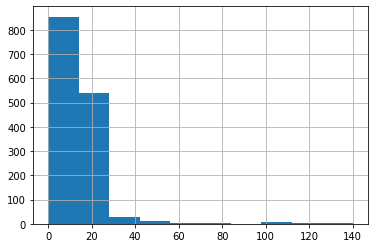

In [ ]:
etomidate_patients.dose.hist()

In [ ]:
etomidate_patients.describe()

,admissionid,orderid,ordercategoryid,itemid,isadditive,isconditional,rate,doserateperkg,dose,doseunitid,administered,administeredunitid,start,stop,duration,solutionitemid,solutionadministered,fluidin,iscontinuous
count,1453.000000,1.453000e+03,1453.0,1453.0,1453.0,1453.0,112.0,1453.0,1453.000000,1453.000000,1453.000000,1453.000000,1.453000e+03,1.453000e+03,1453.0,105.000000,112.000000,1453.000000,1453.0
mean,11443.564350,4.707174e+06,23.0,7214.0,0.0,0.0,0.0,0.0,13.556848,10.000688,13.556848,10.000688,7.721820e+09,7.721880e+09,1.0,8991.771429,6.142857,0.473503,0.0
std,6623.798134,2.263476e+06,0.0,0.0,0.0,0.0,0.0,0.0,12.510248,0.026234,12.510248,0.026234,3.276554e+10,3.276554e+10,0.0,1.085367,3.175376,1.859332,0.0
min,5.000000,9.880000e+03,23.0,7214.0,0.0,0.0,0.0,0.0,0.000000,10.000000,0.000000,10.000000,0.000000e+00,6.000000e+04,1.0,8987.000000,1.000000,0.000000,0.0
25%,5682.000000,3.063010e+06,23.0,7214.0,0.0,0.0,0.0,0.0,8.000000,10.000000,8.000000,10.000000,4.590000e+07,4.596000e+07,1.0,8992.000000,3.000000,0.000000,0.0
50%,11265.000000,5.357520e+06,23.0,7214.0,0.0,0.0,0.0,0.0,12.000000,10.000000,12.000000,10.000000,3.511800e+08,3.512400e+08,1.0,8992.000000,6.000000,0.000000,0.0
75%,17037.000000,6.529173e+06,23.0,7214.0,0.0,0.0,0.0,0.0,20.000000,10.000000,20.000000,10.000000,1.274700e+09,1.274760e+09,1.0,8992.000000,9.250000,0.000000,0.0
max,23516.000000,7.656552e+06,23.0,7214.0,0.0,0.0,0.0,0.0,140.000000,11.000000,140.000000,11.000000,3.156802e+11,3.156802e+11,1.0,8993.000000,15.000000,15.000000,0.0


In [ ]:
len(set(sepsis_patients.admissionid).intersection(etomidate_patients.admissionid))

108

In [ ]:
drug = pd.read_gbq(
    '''
    SELECT item    
    FROM drugitems
    WHERE ordercategoryid = 23
      '''
    , configuration=config_gbq)

In [ ]:
drug.head()

,item
0,Fenytoïne (Diphantoïne)
1,Lorazepam (Temesta)
2,Lorazepam (Temesta)
3,Fenytoïne (Diphantoïne)
4,Valproinezuur (Orfiril)


In [ ]:
set(drug.item)

{'Acetylsalicylzuur (Aspegic)',
 'Biperideen (Akineton)',
 'Chloorpromazine (Largactil)',
 'Clonazepam (Rivotril)',
 'Dantroleen (Dantrium)',
 'Dehydrobenzoperidol (Droperidol)',
 'Diazepam (Valium)',
 'Esketamine (Ketanest-S)',
 'Etomidaat (Hypnomidate)',
 'Fentanyl',
 'Fenytoïne (Diphantoïne)',
 'Haloperidol (Haldol)',
 'Ketamine (Ketalar)',
 'Levetiracetam (Keppra)',
 'Levomepromazine (Nozinan)',
 'Lidocaïne (Xylocard)',
 'Lorazepam (Temesta)',
 'Methadon (Symoron)',
 'Midazolam (Dormicum)',
 'Morfine',
 'Naloxon (Narcan)',
 'Nicomorfine (Vilan)',
 'Pancuronium (Pavulon)',
 'Paracetamol',
 'Pentobarbital (Nembutal)',
 'Pethidine',
 'Piritramide (Dipidolor)',
 'Propofol (Diprivan)',
 'Pupivacaïne 0,25%',
 'Pyridostigmine (Mestinon)',
 'Rocuronium (Esmeron)',
 'Sufentanil (Sufenta)',
 'Suxamethonium (Succinylcholine)',
 'Thalamonal (Droperidol)',
 'Thiopental (Nesdonal)',
 'Valproinezuur (Orfiril)',
 'Valproïnezuur (Orfiril/Depakine)',
 'Vecuronium (Norcuron)',
 'X nader te bepalen'}

In [ ]:
mnozina = set(drug.ordercategory)

In [ ]:
len(mnozina)

26

In [ ]:
type(mnozina)

set

In [ ]:
steroids.loc[steroids.ordercategory == 'Injecties CZS/Sedatie/Analgetica','item']

0       Etomidaat (Hypnomidate)
1       Etomidaat (Hypnomidate)
2       Etomidaat (Hypnomidate)
3       Etomidaat (Hypnomidate)
4       Etomidaat (Hypnomidate)
                 ...           
1448    Etomidaat (Hypnomidate)
1449    Etomidaat (Hypnomidate)
1450    Etomidaat (Hypnomidate)
1451    Etomidaat (Hypnomidate)
1452    Etomidaat (Hypnomidate)
Name: item, Length: 1453, dtype: object

In [ ]:
936780000/(24*60*60*1000)

10.842361111111112

In [ ]:
ddd = pd.read_gbq(
    '''
    SELECT item, ordercategoryname    
    FROM procedureorderitems 
   
      '''
    , configuration=config_gbq)

In [ ]:
ddd

,item,ordercategoryname
0,SNAQ score bepalen,Opdr. Voeding
1,X-Opdr. Voeding,Opdr. Voeding
2,X-Opdr. Infectie,Opdr. Infectie
3,X-Opdr. Voeding,Opdr. Voeding
4,Catheteriseren,Opdr. Urologisch
...,...,...
2188621,Opdr.\Proc. wijzigen,1. Stoppen/Wijzigen
2188622,Opdr.\Proc. wijzigen,1. Stoppen/Wijzigen
2188623,Opdr.\Proc. wijzigen,1. Stoppen/Wijzigen
2188624,Opdr.\Proc. wijzigen,1. Stoppen/Wijzigen


In [ ]:
ddd[ddd['item'].str.contains('scor', case=False)]
#lactate_ids = dictionary[dictionary['item'].str.contains(r'la[ck]taat|lactate', regex=True, case=False)]

,item,ordercategoryname
0,SNAQ score bepalen,Opdr. Voeding
8,SNAQ score bepalen,Opdr. Voeding
13,SNAQ score bepalen,Opdr. Voeding
25,SNAQ score bepalen,Opdr. Voeding
38,SNAQ score bepalen,Opdr. Voeding
...,...,...
1865036,Decubitus score,Opdr. Huid
1865037,Decubitus score,Opdr. Huid
1865038,Decubitus score,Opdr. Huid
1865039,Decubitus score,Opdr. Huid


In [ ]:
acth_ids = dictionary[dictionary['item'].str.contains(r'intub', regex=True, case=False)]

In [ ]:
acth_ids

,itemid,item,item_en,abbreviation,categoryid,category,category_en,ordercategoryid,ordercategory,islabresult,valueid,value,unitid,unit,low_normal_value,high_normal_value,table,count,count_validated
2667,14562,Intubatie_Complicaties,NaN,Intubatie_Complicaties,688,Klinische verrichting Respiratie,NaN,NaN,NaN,0.0,1.0,Failed intubation,NaN,NaN,NaN,NaN,listitems,3,3.0
2668,14562,Intubatie_Complicaties,NaN,Intubatie_Complicaties,688,Klinische verrichting Respiratie,NaN,NaN,NaN,0.0,2.0,Oesofageale intubatie,NaN,NaN,NaN,NaN,listitems,8,8.0
2669,14562,Intubatie_Complicaties,NaN,Intubatie_Complicaties,688,Klinische verrichting Respiratie,NaN,NaN,NaN,0.0,3.0,Te diepe tube,NaN,NaN,NaN,NaN,listitems,10,10.0
2670,14562,Intubatie_Complicaties,NaN,Intubatie_Complicaties,688,Klinische verrichting Respiratie,NaN,NaN,NaN,0.0,4.0,Aspiratie,NaN,NaN,NaN,NaN,listitems,22,22.0
2671,14562,Intubatie_Complicaties,NaN,Intubatie_Complicaties,688,Klinische verrichting Respiratie,NaN,NaN,NaN,0.0,6.0,Tracheabeschadiging,NaN,NaN,NaN,NaN,listitems,1,1.0
2672,14562,Intubatie_Complicaties,NaN,Intubatie_Complicaties,688,Klinische verrichting Respiratie,NaN,NaN,NaN,0.0,7.0,Gebitsbeschadiging,NaN,NaN,NaN,NaN,listitems,4,4.0
2673,14562,Intubatie_Complicaties,NaN,Intubatie_Complicaties,688,Klinische verrichting Respiratie,NaN,NaN,NaN,0.0,8.0,Hypoxie,NaN,NaN,NaN,NaN,listitems,36,36.0
2674,14562,Intubatie_Complicaties,NaN,Intubatie_Complicaties,688,Klinische verrichting Respiratie,NaN,NaN,NaN,0.0,10.0,Anders,NaN,NaN,NaN,NaN,listitems,21,21.0
2675,14562,Intubatie_Complicaties,NaN,Intubatie_Complicaties,688,Klinische verrichting Respiratie,NaN,NaN,NaN,0.0,11.0,Bloeding,NaN,NaN,NaN,NaN,listitems,5,5.0
2676,14562,Intubatie_Complicaties,NaN,Intubatie_Complicaties,688,Klinische verrichting Respiratie,NaN,NaN,NaN,0.0,12.0,Larynx/pharynx oedeem,NaN,NaN,NaN,NaN,listitems,8,8.0


In [ ]:
dictionary.describe()

,itemid,categoryid,ordercategoryid,islabresult,valueid,unitid,count,count_validated
count,9031.000000,9031.000000,1730.000000,7096.000000,4509.000000,1676.000000,9.031000e+03,7.096000e+03
mean,14458.686303,553.309932,58.470520,0.266347,74.298514,112.025656,1.125427e+05,1.172238e+04
std,3979.745856,151.749630,27.675671,0.442079,169.986067,84.894287,1.462982e+06,9.777448e+04
min,6637.000000,265.000000,15.000000,0.000000,1.000000,0.000000,1.000000e+00,0.000000e+00
25%,11155.500000,444.000000,31.000000,0.000000,4.000000,41.000000,6.000000e+00,5.000000e+00
50%,15025.000000,584.000000,56.000000,0.000000,10.000000,97.000000,4.600000e+01,3.100000e+01
75%,18012.000000,706.000000,81.000000,1.000000,39.000000,191.000000,4.510000e+02,3.060000e+02
max,21242.000000,747.000000,119.000000,1.000000,895.000000,340.000000,3.773240e+07,2.218626e+06
